# Information about the dataset

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

Attribute Information
1. ID - ID number of the image
2. Clump Thickness - 1 to 10
3. Cell Size - 1 to 10
4. Cell Shape - 1 to 10
5. Marginal Adhesion - 1 to 10
6. Single Epethelial cell size - 1 to 10
7. Bare nuclei - 1 to 10 
8. Normal Nucleoli - 1 to 10
9. Bland Chromatin - 1 to 10
10. Mitosis - 1 to 10
 
Class - Dependent Variable - 2 for benign 4 for malignant

### Read the data given in bc2.csv file

In [144]:
import pandas as pd
fna_df = pd.read_csv('bc2.csv')

### Observe the no.of records in dataset and type of each feature 

In [145]:
fna_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [146]:
fna_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


### Use summary statistics to check if missing values, outlier and encoding treament is necessary


In [147]:
fna_df['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

### Check Missing Values

### Check how many `?` there in Bare Nuclei feature (they are also unknown or missing values). Replace them with the top value of the describe function of Bare Nuclei feature.

#### Check include='all' parameter in describe function

In [148]:
fna_df['Bare Nuclei'] = fna_df['Bare Nuclei'].replace('?',1)
fna_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,699,NaN,NaN,NaN,1.0717e+06,617096,61634,870688,1.17171e+06,1.2383e+06,1.34544e+07
ClumpThickness,699,NaN,NaN,NaN,4.41774,2.81574,1,2,4,6,10
Cell Size,699,NaN,NaN,NaN,3.13448,3.05146,1,1,1,5,10
Cell Shape,699,NaN,NaN,NaN,3.20744,2.97191,1,1,1,5,10
Marginal Adhesion,699,NaN,NaN,NaN,2.80687,2.85538,1,1,1,4,10
Single Epithelial Cell Size,699,NaN,NaN,NaN,3.21602,2.2143,1,2,2,4,10
Bare Nuclei,699,11,1,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Normal Nucleoli,699,NaN,NaN,NaN,3.43777,2.43836,1,2,3,5,10
Bland Chromatin,699,NaN,NaN,NaN,2.86695,3.05363,1,1,1,4,10
Mitoses,699,NaN,NaN,NaN,1.58941,1.71508,1,1,1,1,10


### Print and plot the distribution of target variable (Class - using Histogram) 

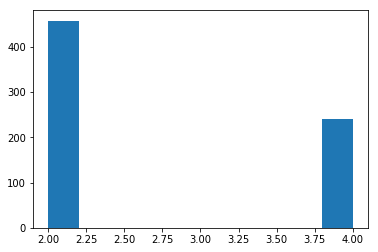

In [149]:
import matplotlib.pyplot as plt
plt.hist(fna_df['Class'])
plt.show()

### convert the datatype of Bare Nuclei to `int`

In [150]:
fna_df['Bare Nuclei'] = fna_df['Bare Nuclei'].astype('int',inplace=True)
fna_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,699.0,3.486409e+00,3.621929,1.0,1.0,1.0,5.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0


### Standardization of Data (Use Standard Scaler)

In [151]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X =  fna_df.drop(["Class","ID","Cell Size"], axis=1)
y =  fna_df.pop("Class")
X_std = StandardScaler().fit_transform(X)

### Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them. (Use pd.scatter matrix())

In [152]:
#Based on the correlation dropped Cell Size
X.corr()
#Based on the below value Cell Shape is also having strong correlation. Hence dropping that
X =  X.drop("Cell Shape", axis=1)
X_std = StandardScaler().fit_transform(X)

In [153]:
X.corr()

,ClumpThickness,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
ClumpThickness,1.000000,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034
Marginal Adhesion,0.486356,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633
Single Epithelial Cell Size,0.521816,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101
Bare Nuclei,0.590008,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397
Normal Nucleoli,0.558428,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169
Bland Chromatin,0.535835,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336
Mitoses,0.350034,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000


### Divide the dataset into feature set and target set

In [154]:
train_set, test_set, train_labels, test_labels = train_test_split(X_std, y, test_size=0.30, random_state=2)

### Divide the Training and Test sets in 70:30 

In [157]:
type(train_set)

numpy.ndarray

### Model 1 : Implement a default Decision Tree model with no attributes

In [155]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' ,random_state=0)
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

### Check the feature importances of the Decision Tree model

In [156]:
dt_model.feature_importances_

array([0.12881003, 0.0274906 , 0.04701265, 0.23468524, 0.55763837,
       0.0043631 , 0.        ])

### Check the training & test accuracy of model 1 

In [159]:
from sklearn import metrics
y_pred=dt_model.predict(test_set)   # performance on test data
acc=metrics.accuracy_score(test_labels,y_pred)
print(acc)

0.9285714285714286


### Model 2: Implement a decision tree with depth of the tree = 10 and leaf nodes = 5

In [160]:
dt_model_RG = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, max_leaf_nodes = 5)
dt_model_RG.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### Check the training & test accuracy of model 2

In [161]:
y_pred_RG=dt_model_RG.predict(test_set)   # performance on test data of regularized tree
acc_RG=metrics.accuracy_score(test_labels,y_pred_RG)
print(acc_RG)

0.9095238095238095


### Print the confusion matrix of model 1 and model 2

In [169]:
from sklearn.metrics import confusion_matrix
print ('Confusion Matrix for Model 1: ', metrics.confusion_matrix(test_labels,y_pred))
print ('Confusion Matrix for Model 2: ', metrics.confusion_matrix(test_labels,y_pred_RG))

Confusion Matrix for Model 1:  [[134   8]
 [  7  61]]
Confusion Matrix for Model 2:  [[125  17]
 [  2  66]]
